In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
Loan_Defaulters_Data= pd.read_csv("D:/Mathlog/Logistic_Regression/UniversalBank.csv")
Loan_Defaulters_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
Loan_Defaulters_Data.shape

(5000, 14)

In [4]:
print(Loan_Defaulters_Data.columns.values)

['ID' 'Age' 'Experience' 'Income' 'ZIP Code' 'Family' 'CCAvg' 'Education'
 'Mortgage' 'Personal Loan' 'Securities Account' 'CD Account' 'Online'
 'CreditCard']


In [5]:
Loan_Defaulters_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
Loan_Defaulters_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
Loan_Defaulters_Data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
CD_null = Loan_Defaulters_Data.isnull().sum()
CD_null

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
CD_null_prcnt = (CD_null*100/len(Loan_Defaulters_Data))
CD_null_prcnt

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

In [10]:
Loan_Defaulters_Data = Loan_Defaulters_Data.drop('ZIP Code', 1)
Loan_Defaulters_Data.shape

(5000, 13)

In [11]:
Loan_Defaulters_Data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
print(Loan_Defaulters_Data.columns.values)

['ID' 'Age' 'Experience' 'Income' 'Family' 'CCAvg' 'Education' 'Mortgage'
 'Personal Loan' 'Securities Account' 'CD Account' 'Online' 'CreditCard']


In [13]:
#Univariate

In [14]:
Loan_Defaulters_Data.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [15]:
age = pd.DataFrame(Loan_Defaulters_Data.Age.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
age

,Age
0.01,25.0
0.05,27.0
0.10,30.0
0.20,34.0
0.30,38.0
0.40,42.0
0.50,45.0
0.60,50.0
0.70,53.0
0.80,57.0


In [16]:
Loan_Defaulters_Data.Experience.describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [17]:
experience = pd.DataFrame(Loan_Defaulters_Data.Experience.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
experience

,Experience
0.01,-1.0
0.05,2.0
0.10,4.0
0.20,8.0
0.30,12.0
0.40,17.0
0.50,20.0
0.60,24.0
0.70,28.0
0.80,32.0


In [18]:
Loan_Defaulters_Data.Income.describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [19]:
income = pd.DataFrame(Loan_Defaulters_Data.Income.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
income

,Income
0.01,10.0
0.05,18.0
0.10,22.0
0.20,33.0
0.30,42.0
0.40,52.0
0.50,64.0
0.60,78.0
0.70,88.3
0.80,113.0


In [20]:
Loan_Defaulters_Data.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [21]:
ccavg = pd.DataFrame(Loan_Defaulters_Data.CCAvg.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
ccavg

,CCAvg
0.01,0.0
0.05,0.1
0.10,0.3
0.20,0.5
0.30,0.8
0.40,1.2
0.50,1.5
0.60,1.9
0.70,2.3
0.80,2.8


In [22]:
Loan_Defaulters_Data.Mortgage.describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [23]:
mortgage = pd.DataFrame(Loan_Defaulters_Data.Mortgage.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
mortgage

,Mortgage
0.01,0.00
0.05,0.00
0.10,0.00
0.20,0.00
0.30,0.00
0.40,0.00
0.50,0.00
0.60,0.00
0.70,78.00
0.80,123.00


In [24]:
UniVariate = pd.concat([age, experience, income, ccavg, mortgage],axis = 1)
UniVariate

,Age,Experience,Income,CCAvg,Mortgage
0.01,25.0,-1.0,10.0,0.0,0.00
0.05,27.0,2.0,18.0,0.1,0.00
0.10,30.0,4.0,22.0,0.3,0.00
0.20,34.0,8.0,33.0,0.5,0.00
0.30,38.0,12.0,42.0,0.8,0.00
0.40,42.0,17.0,52.0,1.2,0.00
0.50,45.0,20.0,64.0,1.5,0.00
0.60,50.0,24.0,78.0,1.9,0.00
0.70,53.0,28.0,88.3,2.3,78.00
0.80,57.0,32.0,113.0,2.8,123.00


In [25]:
Loan_Defaulters_Data['NoOfCustomers'] = 1

In [26]:
Loan_Defaulters_Data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,NoOfCustomers
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,1
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,1


In [27]:
Family_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["Family"],aggfunc = len) 
print (Family_table)

        NoOfCustomers
Family               
1                1472
2                1296
3                1010
4                1222


In [28]:
def prop(x):    return x/sum(x)
prop = Family_table.apply(prop)
Family_table['freqPct'] = prop['NoOfCustomers']
Family_table

,NoOfCustomers,freqPct
Family,,
1,1472,0.2944
2,1296,0.2592
3,1010,0.2020
4,1222,0.2444


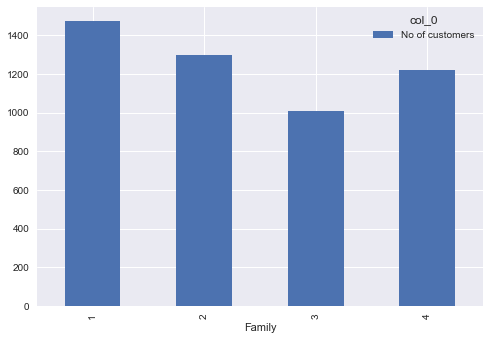

In [29]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["Family"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [30]:
Education_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["Education"],aggfunc = len) 
print (Education_table)

           NoOfCustomers
Education               
1                   2096
2                   1403
3                   1501


In [31]:
def prop(x):    return x/sum(x)
prop = Education_table.apply(prop)
Education_table['freqPct'] = prop['NoOfCustomers']
Education_table

,NoOfCustomers,freqPct
Education,,
1,2096,0.4192
2,1403,0.2806
3,1501,0.3002


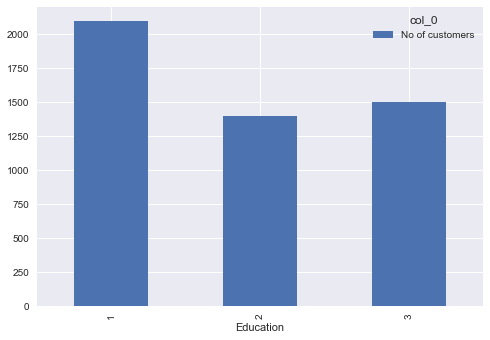

In [32]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["Education"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [33]:
Loan_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["Personal Loan"],aggfunc = len) 
print (Loan_table)

               NoOfCustomers
Personal Loan               
0                       4520
1                        480


In [34]:
def prop(x):    return x/sum(x)
prop = Loan_table.apply(prop)
Loan_table['freqPct'] = prop['NoOfCustomers']
Loan_table

,NoOfCustomers,freqPct
Personal Loan,,
0,4520,0.904
1,480,0.096


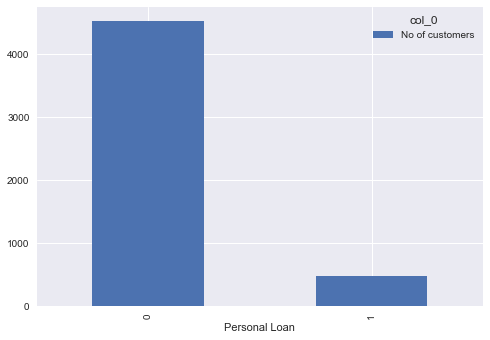

In [35]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["Personal Loan"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [36]:
SecuritiesAcnt_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["Securities Account"],aggfunc = len) 
print (SecuritiesAcnt_table)

                    NoOfCustomers
Securities Account               
0                            4478
1                             522


In [37]:
def prop(x):    return x/sum(x)
prop = SecuritiesAcnt_table.apply(prop)
SecuritiesAcnt_table['freqPct'] = prop['NoOfCustomers']
SecuritiesAcnt_table

,NoOfCustomers,freqPct
Securities Account,,
0,4478,0.8956
1,522,0.1044


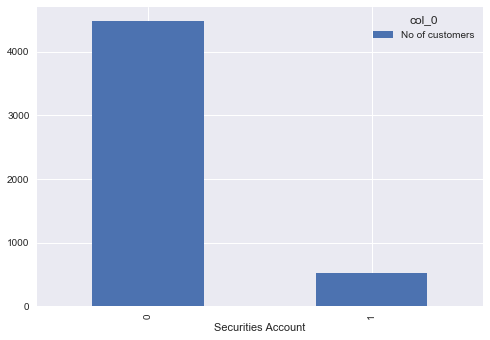

In [38]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["Securities Account"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [39]:
CDAcnt_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["CD Account"],aggfunc = len) 
print (CDAcnt_table)

            NoOfCustomers
CD Account               
0                    4698
1                     302


In [40]:
def prop(x):    return x/sum(x)
prop = CDAcnt_table.apply(prop)
CDAcnt_table['freqPct'] = prop['NoOfCustomers']
CDAcnt_table

,NoOfCustomers,freqPct
CD Account,,
0,4698,0.9396
1,302,0.0604


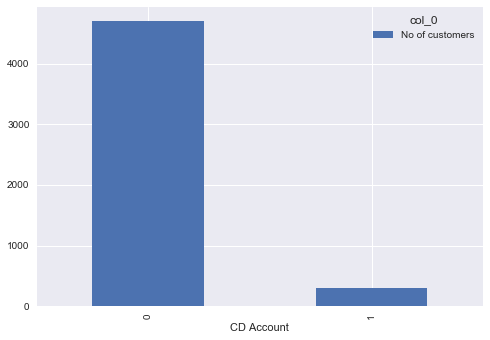

In [41]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["CD Account"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [42]:
Online_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["Online"],aggfunc = len) 
print (Online_table)

        NoOfCustomers
Online               
0                2016
1                2984


In [43]:
def prop(x):    return x/sum(x)
prop = Online_table.apply(prop)
Online_table['freqPct'] = prop['NoOfCustomers']
Online_table

,NoOfCustomers,freqPct
Online,,
0,2016,0.4032
1,2984,0.5968


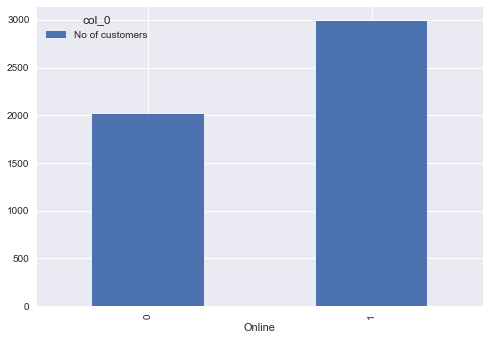

In [44]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["Online"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [45]:
creditcard_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers"],index=["CreditCard"],aggfunc = len) 
print (creditcard_table)

            NoOfCustomers
CreditCard               
0                    3530
1                    1470


In [46]:
def prop(x):    return x/sum(x)
prop = creditcard_table.apply(prop)
creditcard_table['freqPct'] = prop['NoOfCustomers']
creditcard_table

,NoOfCustomers,freqPct
CreditCard,,
0,3530,0.706
1,1470,0.294


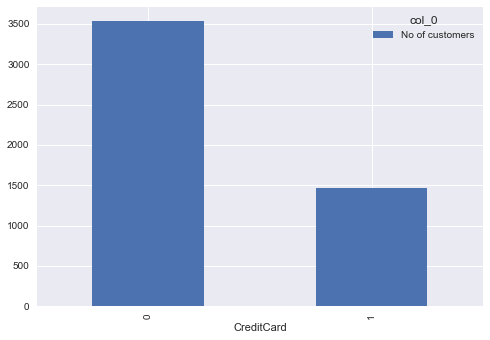

In [47]:
my_tab = pd.crosstab(index = Loan_Defaulters_Data["CreditCard"],  # Make a crosstab
                              columns="No of customers")      # Name the count column
my_tab.plot.bar()

In [48]:
#Bivariate Analysis

In [49]:
Age_deciles = pd.qcut(round(Loan_Defaulters_Data['Age']), 10)
Loan_Defaulters_Data['Age_Buckets'] = Age_deciles
Age_Table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"], index=["Age_Buckets"],aggfunc='sum')
Age_Table

,NoOfCustomers,Personal Loan
Age_Buckets,,
"(22.999, 30.0]",624,66
"(30.0, 34.0]",499,52
"(34.0, 38.0]",479,52
"(38.0, 42.0]",520,36
"(42.0, 45.0]",397,42
"(45.0, 50.0]",611,58
"(50.0, 53.0]",386,36
"(53.0, 57.0]",535,50
"(57.0, 61.0]",524,41


In [50]:
def prop(x):    return x/sum(x)
prop = Age_Table.apply(prop)
Age_Table['customer_Pct'] = prop['NoOfCustomers']
Age_Table['loan_pct'] = prop['Personal Loan']
Age_Table

,NoOfCustomers,Personal Loan,customer_Pct,loan_pct
Age_Buckets,,,,
"(22.999, 30.0]",624,66,0.1248,0.137500
"(30.0, 34.0]",499,52,0.0998,0.108333
"(34.0, 38.0]",479,52,0.0958,0.108333
"(38.0, 42.0]",520,36,0.1040,0.075000
"(42.0, 45.0]",397,42,0.0794,0.087500
"(45.0, 50.0]",611,58,0.1222,0.120833
"(50.0, 53.0]",386,36,0.0772,0.075000
"(53.0, 57.0]",535,50,0.1070,0.104167
"(57.0, 61.0]",524,41,0.1048,0.085417


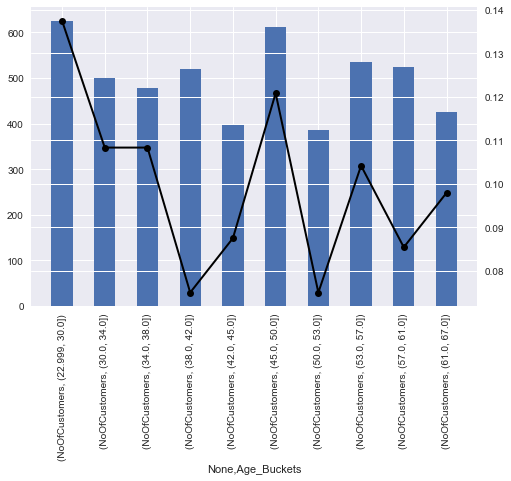

In [51]:
fig = plt.figure()
ax = Age_Table[['NoOfCustomers']].unstack('Age_Buckets').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Age_Table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [52]:
Experience_deciles = pd.qcut(round(Loan_Defaulters_Data['Experience']), 10)
Loan_Defaulters_Data['Experience_Buckets'] = Experience_deciles
Experience_Table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"], index=["Experience_Buckets"],aggfunc='sum')
Experience_Table

,NoOfCustomers,Personal Loan
Experience_Buckets,,
"(-3.001, 4.0]",519,50
"(4.0, 8.0]",505,56
"(8.0, 12.0]",483,56
"(12.0, 17.0]",615,46
"(17.0, 20.0]",420,43
"(20.0, 24.0]",512,45
"(24.0, 28.0]",539,49
"(28.0, 32.0]",508,51
"(32.0, 36.0]",499,42


In [53]:
def prop(x):    return x/sum(x)
prop = Experience_Table.apply(prop)
Experience_Table['customer_Pct'] = prop['NoOfCustomers']
Experience_Table['loan_pct'] = prop['Personal Loan']
Experience_Table

,NoOfCustomers,Personal Loan,customer_Pct,loan_pct
Experience_Buckets,,,,
"(-3.001, 4.0]",519,50,0.1038,0.104167
"(4.0, 8.0]",505,56,0.1010,0.116667
"(8.0, 12.0]",483,56,0.0966,0.116667
"(12.0, 17.0]",615,46,0.1230,0.095833
"(17.0, 20.0]",420,43,0.0840,0.089583
"(20.0, 24.0]",512,45,0.1024,0.093750
"(24.0, 28.0]",539,49,0.1078,0.102083
"(28.0, 32.0]",508,51,0.1016,0.106250
"(32.0, 36.0]",499,42,0.0998,0.087500


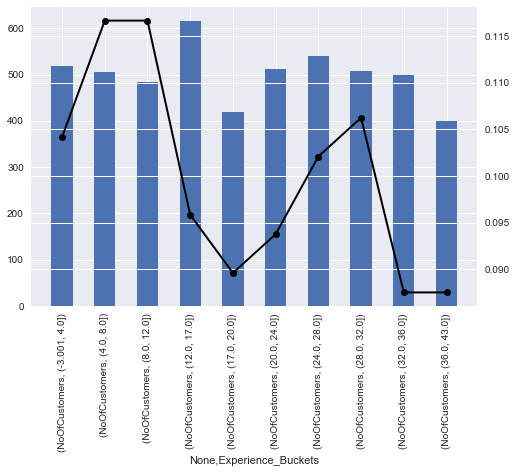

In [54]:
fig = plt.figure()
ax = Experience_Table[['NoOfCustomers']].unstack('Experience_Buckets').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Experience_Table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [55]:
Income_deciles = pd.qcut(round(Loan_Defaulters_Data['Income']), 10)
Loan_Defaulters_Data['Income_Buckets'] = Income_deciles
Income_Table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"], index=["Income_Buckets"],aggfunc='sum')
Income_Table

,NoOfCustomers,Personal Loan
Income_Buckets,,
"(7.999, 22.0]",507,0
"(22.0, 33.0]",522,0
"(33.0, 42.0]",520,0
"(42.0, 52.0]",453,0
"(52.0, 64.0]",548,2
"(64.0, 78.0]",469,5
"(78.0, 88.3]",481,12
"(88.3, 113.0]",521,65
"(113.0, 145.0]",495,168


In [56]:
def prop(x):    return x/sum(x)
prop = Income_Table.apply(prop)
Income_Table['customer_Pct'] = prop['NoOfCustomers']
Income_Table['loan_pct'] = prop['Personal Loan']
Income_Table

,NoOfCustomers,Personal Loan,customer_Pct,loan_pct
Income_Buckets,,,,
"(7.999, 22.0]",507,0,0.1014,0.000000
"(22.0, 33.0]",522,0,0.1044,0.000000
"(33.0, 42.0]",520,0,0.1040,0.000000
"(42.0, 52.0]",453,0,0.0906,0.000000
"(52.0, 64.0]",548,2,0.1096,0.004167
"(64.0, 78.0]",469,5,0.0938,0.010417
"(78.0, 88.3]",481,12,0.0962,0.025000
"(88.3, 113.0]",521,65,0.1042,0.135417
"(113.0, 145.0]",495,168,0.0990,0.350000


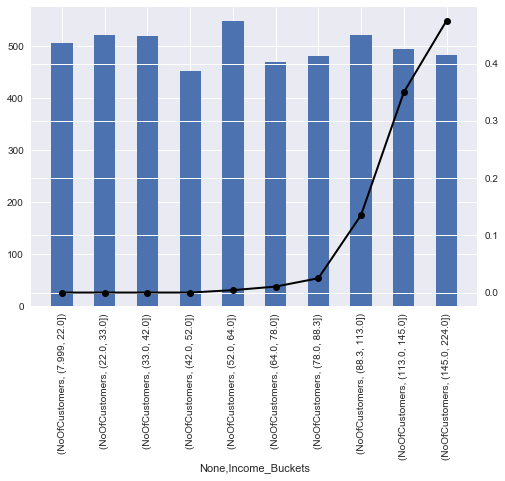

In [57]:
fig = plt.figure()
ax = Income_Table[['NoOfCustomers']].unstack('Income_Buckets').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Income_Table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [58]:
CCAvg_deciles = pd.qcut(round(Loan_Defaulters_Data['CCAvg']), 10, duplicates='drop')
Loan_Defaulters_Data['CCAvg_Buckets'] = CCAvg_deciles
CCAvg_Table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"], index=["CCAvg_Buckets"],aggfunc='sum')
CCAvg_Table

,NoOfCustomers,Personal Loan
CCAvg_Buckets,,
"(-0.001, 1.0]",2337,74
"(1.0, 2.0]",1415,44
"(2.0, 3.0]",527,91
"(3.0, 4.0]",287,96
"(4.0, 10.0]",434,175


In [59]:
def prop(x):    return x/sum(x)
prop = CCAvg_Table.apply(prop)
CCAvg_Table['customer_Pct'] = prop['NoOfCustomers']
CCAvg_Table['loan_pct'] = prop['Personal Loan']
CCAvg_Table

,NoOfCustomers,Personal Loan,customer_Pct,loan_pct
CCAvg_Buckets,,,,
"(-0.001, 1.0]",2337,74,0.4674,0.154167
"(1.0, 2.0]",1415,44,0.2830,0.091667
"(2.0, 3.0]",527,91,0.1054,0.189583
"(3.0, 4.0]",287,96,0.0574,0.200000
"(4.0, 10.0]",434,175,0.0868,0.364583


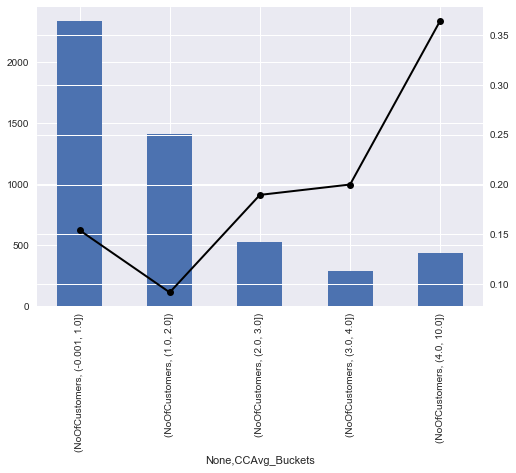

In [60]:
fig = plt.figure()
ax = CCAvg_Table[['NoOfCustomers']].unstack('CCAvg_Buckets').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(CCAvg_Table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [61]:
Mortgage_deciles = pd.qcut(round(Loan_Defaulters_Data['Mortgage']), 10, duplicates='drop')
Loan_Defaulters_Data['Mortgage_Buckets'] = Mortgage_deciles
Mortgage_Table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"], index=["Mortgage_Buckets"],aggfunc='sum')
Mortgage_Table

,NoOfCustomers,Personal Loan
Mortgage_Buckets,,
"(-0.001, 78.0]",3501,314
"(78.0, 123.0]",507,23
"(123.0, 200.0]",494,27
"(200.0, 635.0]",498,116


In [62]:
def prop(x):    return x/sum(x)
prop = Mortgage_Table.apply(prop)
Mortgage_Table['customer_Pct'] = prop['NoOfCustomers']
Mortgage_Table['loan_pct'] = prop['Personal Loan']
Mortgage_Table

,NoOfCustomers,Personal Loan,customer_Pct,loan_pct
Mortgage_Buckets,,,,
"(-0.001, 78.0]",3501,314,0.7002,0.654167
"(78.0, 123.0]",507,23,0.1014,0.047917
"(123.0, 200.0]",494,27,0.0988,0.056250
"(200.0, 635.0]",498,116,0.0996,0.241667


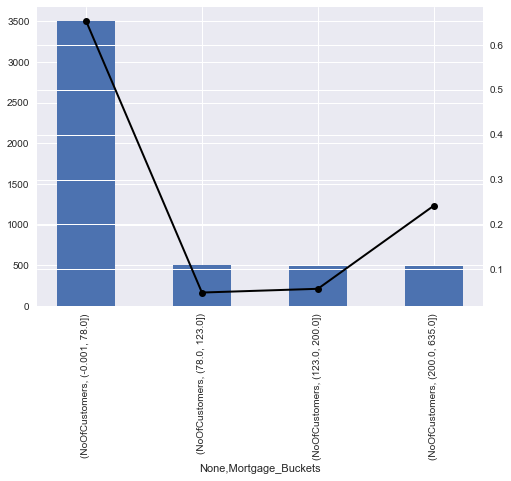

In [63]:
fig = plt.figure()
ax = Mortgage_Table[['NoOfCustomers']].unstack('Mortgage_Buckets').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Mortgage_Table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [64]:
Family_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"],index=["Family"],aggfunc = sum) 
print (Family_table)

        NoOfCustomers  Personal Loan
Family                              
1                1472            107
2                1296            106
3                1010            133
4                1222            134


In [65]:
def prop(x):    return x/sum(x)
prop = Family_table.apply(prop)
Family_table['customer_pct'] = prop['NoOfCustomers']
Family_table['loan_pct'] = prop['Personal Loan']
Family_table

,NoOfCustomers,Personal Loan,customer_pct,loan_pct
Family,,,,
1,1472,107,0.2944,0.222917
2,1296,106,0.2592,0.220833
3,1010,133,0.2020,0.277083
4,1222,134,0.2444,0.279167


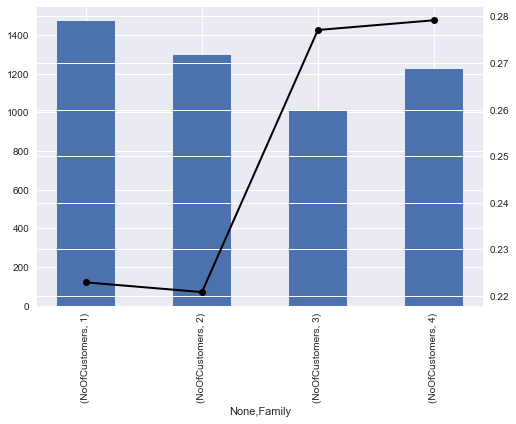

In [66]:
fig = plt.figure()
ax = Family_table[['NoOfCustomers']].unstack('Family').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Family_table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [67]:
Education_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"],index=["Education"],aggfunc = sum) 
print (Education_table)

           NoOfCustomers  Personal Loan
Education                              
1                   2096             93
2                   1403            182
3                   1501            205


In [68]:
def prop(x):    return x/sum(x)
prop = Education_table.apply(prop)
Education_table['customer_pct'] = prop['NoOfCustomers']
Education_table['loan_pct'] = prop['Personal Loan']
Education_table

,NoOfCustomers,Personal Loan,customer_pct,loan_pct
Education,,,,
1,2096,93,0.4192,0.193750
2,1403,182,0.2806,0.379167
3,1501,205,0.3002,0.427083


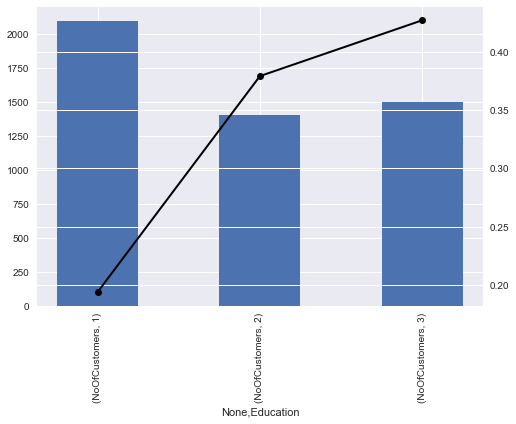

In [69]:
fig = plt.figure()
ax = Education_table[['NoOfCustomers']].unstack('Education').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Education_table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [70]:
SecuritiesAcnt_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"],index=["Securities Account"],aggfunc = sum) 
print (SecuritiesAcnt_table)

                    NoOfCustomers  Personal Loan
Securities Account                              
0                            4478            420
1                             522             60


In [71]:
def prop(x):    return x/sum(x)
prop = SecuritiesAcnt_table.apply(prop)
SecuritiesAcnt_table['customer_pct'] = prop['NoOfCustomers']
SecuritiesAcnt_table['loan_pct'] = prop['Personal Loan']
SecuritiesAcnt_table

,NoOfCustomers,Personal Loan,customer_pct,loan_pct
Securities Account,,,,
0,4478,420,0.8956,0.875
1,522,60,0.1044,0.125


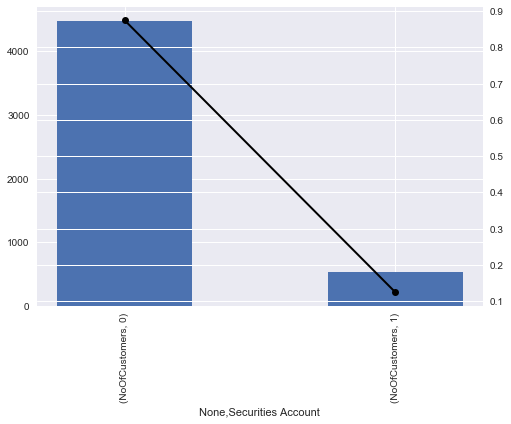

In [72]:
fig = plt.figure()
ax = SecuritiesAcnt_table[['NoOfCustomers']].unstack('Securities Account').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(SecuritiesAcnt_table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [73]:
CDAcnt_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"],index=["CD Account"],aggfunc = sum) 
print (CDAcnt_table)

            NoOfCustomers  Personal Loan
CD Account                              
0                    4698            340
1                     302            140


In [74]:
def prop(x):    return x/sum(x)
prop = CDAcnt_table.apply(prop)
CDAcnt_table['customer_pct'] = prop['NoOfCustomers']
CDAcnt_table['loan_pct'] = prop['Personal Loan']
CDAcnt_table

,NoOfCustomers,Personal Loan,customer_pct,loan_pct
CD Account,,,,
0,4698,340,0.9396,0.708333
1,302,140,0.0604,0.291667


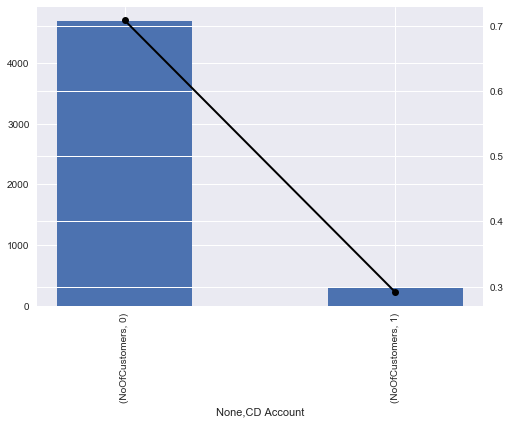

In [75]:
fig = plt.figure()
ax = CDAcnt_table[['NoOfCustomers']].unstack('CD Account').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(CDAcnt_table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [76]:
Online_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"],index=["Online"],aggfunc = sum) 
print (Online_table)

        NoOfCustomers  Personal Loan
Online                              
0                2016            189
1                2984            291


In [77]:
def prop(x):    return x/sum(x)
prop = Online_table.apply(prop)
Online_table['customer_pct'] = prop['NoOfCustomers']
Online_table['loan_pct'] = prop['Personal Loan']
Online_table

,NoOfCustomers,Personal Loan,customer_pct,loan_pct
Online,,,,
0,2016,189,0.4032,0.39375
1,2984,291,0.5968,0.60625


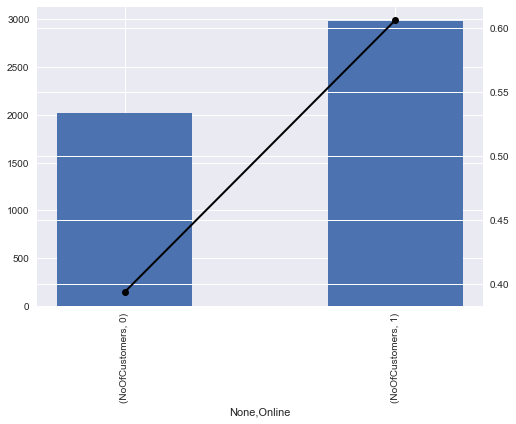

In [78]:
fig = plt.figure()
ax = Online_table[['NoOfCustomers']].unstack('Online').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(Online_table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

In [79]:
creditcard_table = Loan_Defaulters_Data.pivot_table(values=["NoOfCustomers", "Personal Loan"],index=["CreditCard"],aggfunc = sum) 
print (creditcard_table)

            NoOfCustomers  Personal Loan
CreditCard                              
0                    3530            337
1                    1470            143


In [80]:
def prop(x):    return x/sum(x)
prop = creditcard_table.apply(prop)
creditcard_table['customer_pct'] = prop['NoOfCustomers']
creditcard_table['loan_pct'] = prop['Personal Loan']
creditcard_table

,NoOfCustomers,Personal Loan,customer_pct,loan_pct
CreditCard,,,,
0,3530,337,0.706,0.702083
1,1470,143,0.294,0.297917


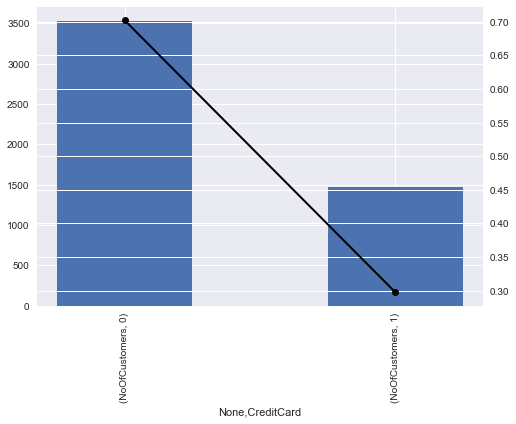

In [81]:
fig = plt.figure()
ax = creditcard_table[['NoOfCustomers']].unstack('CreditCard').plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(creditcard_table[['loan_pct']].values, color='k',linestyle='-', marker='o', linewidth=2.0)

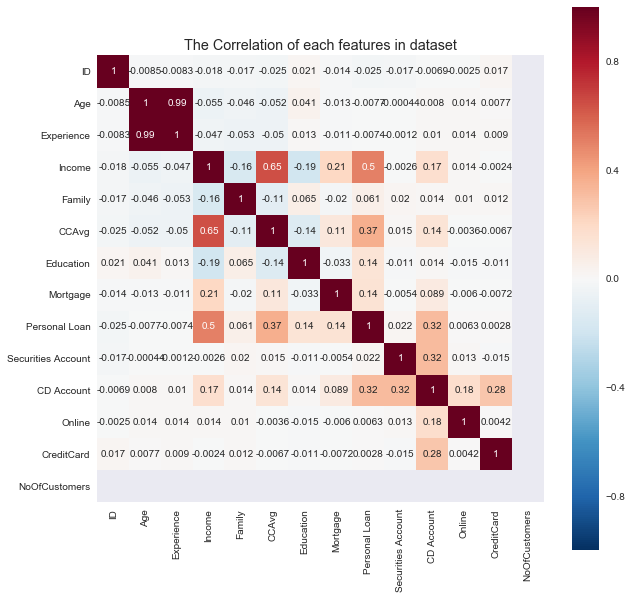

In [82]:
# Calculating the correlation of each variables
correlation = Loan_Defaulters_Data.corr()

### Ploting the correlation 
%matplotlib inline
plt.figure(figsize =(10,10))
sns.heatmap(data= correlation, annot =True, square= True)
plt.title('The Correlation of each features in dataset', fontsize= 'x-large')
plt.show()

In [83]:
#Outlier Treatment


In [84]:
Loan_Defaulters_Data.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,NoOfCustomers
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,1.0
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.0
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.0
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.0
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0


count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

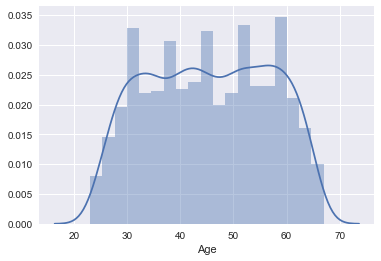

In [85]:
#CustomerAge
sns.distplot(Loan_Defaulters_Data['Age']);
Loan_Defaulters_Data.Age.describe()

In [86]:
age = pd.DataFrame(Loan_Defaulters_Data.Age.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
age

,Age
0.01,25.0
0.05,27.0
0.10,30.0
0.20,34.0
0.30,38.0
0.40,42.0
0.50,45.0
0.60,50.0
0.70,53.0
0.80,57.0


count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

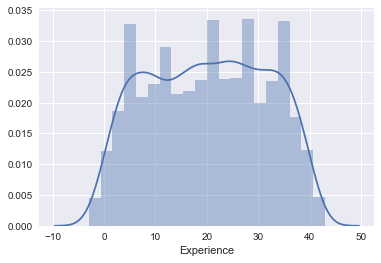

In [87]:
#CustomerExperience
sns.distplot(Loan_Defaulters_Data['Experience']);
Loan_Defaulters_Data.Experience.describe()

In [88]:
Loan_Defaulters_Data['Experience']=np.where(Loan_Defaulters_Data['Experience'] <1, 1, Loan_Defaulters_Data['Experience'])

count    5000.000000
mean       20.143200
std        11.399907
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

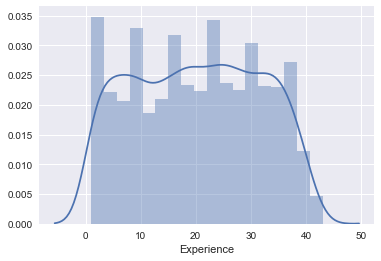

In [89]:
sns.distplot(Loan_Defaulters_Data['Experience']);
Loan_Defaulters_Data.Experience.describe()

In [90]:
experience = pd.DataFrame(Loan_Defaulters_Data.Experience.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
experience

,Experience
0.01,1.0
0.05,2.0
0.10,4.0
0.20,8.0
0.30,12.0
0.40,17.0
0.50,20.0
0.60,24.0
0.70,28.0
0.80,32.0


count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

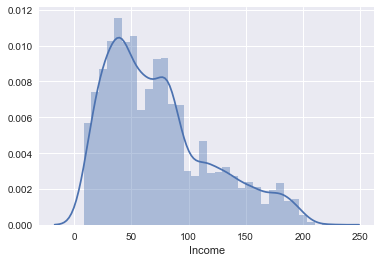

In [91]:
#CustomerIncome
sns.distplot(Loan_Defaulters_Data['Income']);
Loan_Defaulters_Data.Income.describe()

In [92]:
lower_bound = 0.02
upper_bound = 0.99
res_inc = Loan_Defaulters_Data['Income'].quantile([lower_bound, upper_bound])
res_inc

0.02     12.0
0.99    193.0
Name: Income, dtype: float64

count    5000.000000
mean       73.766200
std        45.812571
min        12.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       193.000000
Name: Income, dtype: float64

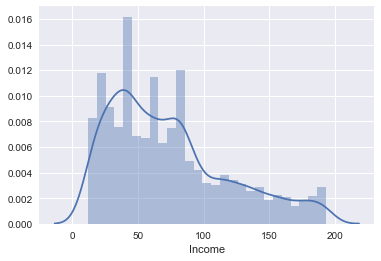

In [93]:
Loan_Defaulters_Data['Income']=np.where(Loan_Defaulters_Data['Income'] >193, 193, Loan_Defaulters_Data['Income'])
Loan_Defaulters_Data['Income']=np.where(Loan_Defaulters_Data['Income'] <12, 12, Loan_Defaulters_Data['Income'])
sns.distplot(Loan_Defaulters_Data['Income']);
Loan_Defaulters_Data.Income.describe()

In [94]:
income = pd.DataFrame(Loan_Defaulters_Data.Income.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
income

,Income
0.01,12.0
0.05,18.0
0.10,22.0
0.20,33.0
0.30,42.0
0.40,52.0
0.50,64.0
0.60,78.0
0.70,88.3
0.80,113.0


count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

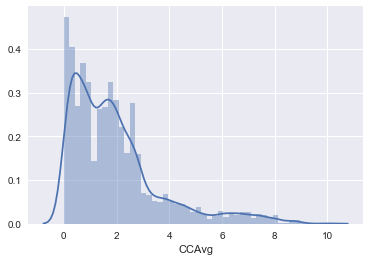

In [95]:
#CCAvg
sns.distplot(Loan_Defaulters_Data['CCAvg']);
Loan_Defaulters_Data.CCAvg.describe()

In [96]:
lower_bound = 0.02
upper_bound = 0.99
res_ccavg = Loan_Defaulters_Data['CCAvg'].quantile([lower_bound, upper_bound])
res_ccavg

0.02    0.0
0.99    8.0
Name: CCAvg, dtype: float64

count    5000.000000
mean        1.932938
std         1.728717
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max         8.000000
Name: CCAvg, dtype: float64

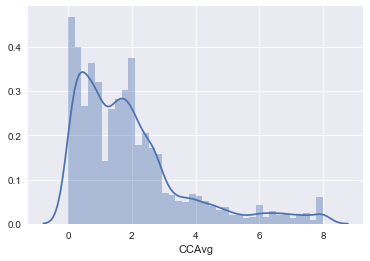

In [97]:
Loan_Defaulters_Data['CCAvg']=np.where(Loan_Defaulters_Data['CCAvg'] >8, 8, Loan_Defaulters_Data['CCAvg'])
sns.distplot(Loan_Defaulters_Data['CCAvg']);
Loan_Defaulters_Data.CCAvg.describe()

In [98]:
ccavg = pd.DataFrame(Loan_Defaulters_Data.CCAvg.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
ccavg

,CCAvg
0.01,0.0
0.05,0.1
0.10,0.3
0.20,0.5
0.30,0.8
0.40,1.2
0.50,1.5
0.60,1.9
0.70,2.3
0.80,2.8


count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

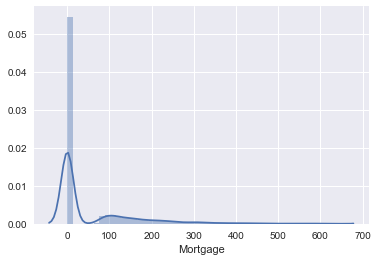

In [99]:
#Mortgage
sns.distplot(Loan_Defaulters_Data['Mortgage']);
Loan_Defaulters_Data.Mortgage.describe()

In [100]:
lower_bound = 0.02
upper_bound = 0.99
res = Loan_Defaulters_Data['Mortgage'].quantile([lower_bound, upper_bound])
res

0.02      0.00
0.99    431.01
Name: Mortgage, dtype: float64

count    5000.000000
mean       55.686000
std        98.160956
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       431.000000
Name: Mortgage, dtype: float64

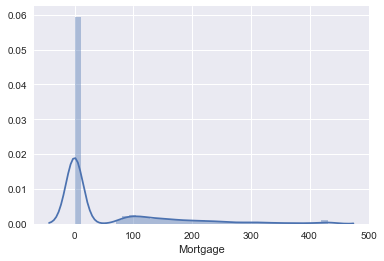

In [101]:
Loan_Defaulters_Data['Mortgage']=np.where(Loan_Defaulters_Data['Mortgage'] >431.0, 431.0, Loan_Defaulters_Data['Mortgage'])
sns.distplot(Loan_Defaulters_Data['Mortgage']);
Loan_Defaulters_Data.Mortgage.describe()

In [102]:
mortgage = pd.DataFrame(Loan_Defaulters_Data.Mortgage.quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
mortgage

,Mortgage
0.01,0.0
0.05,0.0
0.10,0.0
0.20,0.0
0.30,0.0
0.40,0.0
0.50,0.0
0.60,0.0
0.70,78.0
0.80,123.0


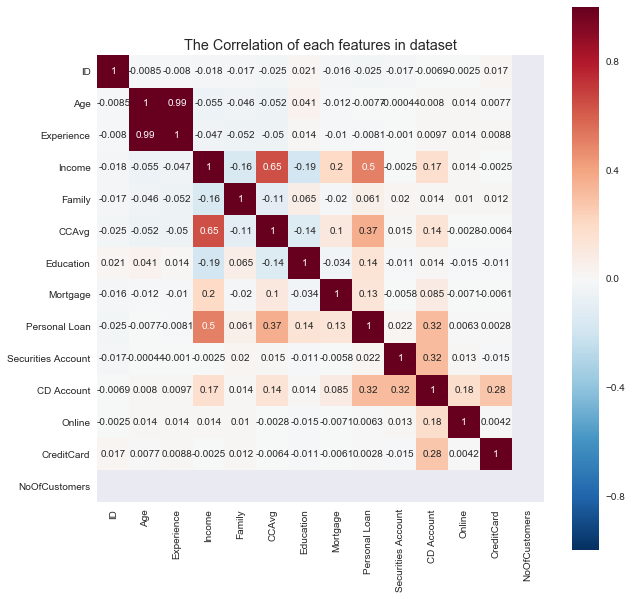

In [103]:
# Calculating the correlation of each variables
correlation = Loan_Defaulters_Data.corr()

### Ploting the correlation 
%matplotlib inline
plt.figure(figsize =(10,10))
sns.heatmap(data= correlation, annot =True, square= True)
plt.title('The Correlation of each features in dataset', fontsize= 'x-large')
plt.show()

In [104]:
print(Loan_Defaulters_Data.columns.values)

['ID' 'Age' 'Experience' 'Income' 'Family' 'CCAvg' 'Education' 'Mortgage'
 'Personal Loan' 'Securities Account' 'CD Account' 'Online' 'CreditCard'
 'NoOfCustomers' 'Age_Buckets' 'Experience_Buckets' 'Income_Buckets'
 'CCAvg_Buckets' 'Mortgage_Buckets']


In [105]:
Loan_Defaulters_Data = Loan_Defaulters_Data.drop(['Age_Buckets','Experience_Buckets','Income_Buckets','Mortgage_Buckets','CCAvg_Buckets'], axis = 1)

In [106]:
print(Loan_Defaulters_Data.columns.values)

['ID' 'Age' 'Experience' 'Income' 'Family' 'CCAvg' 'Education' 'Mortgage'
 'Personal Loan' 'Securities Account' 'CD Account' 'Online' 'CreditCard'
 'NoOfCustomers']


In [107]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard','NoOfCustomers']

In [108]:
X=Loan_Defaulters_Data[cols]
y=Loan_Defaulters_Data['Personal Loan']

In [109]:
#Splitting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [110]:
X_train.shape

(3500, 12)

In [111]:
X_test.shape

(1500, 12)

In [112]:
y_train.shape

(3500,)

In [113]:
y_test.shape

(1500,)

In [114]:
#Building a Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
x= logreg.fit(X_train, y_train)

In [115]:
#Accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [116]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.948


In [117]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1356   16]
 [  52   76]]


In [118]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1372
          1       0.83      0.59      0.69       128

avg / total       0.95      0.95      0.95      1500



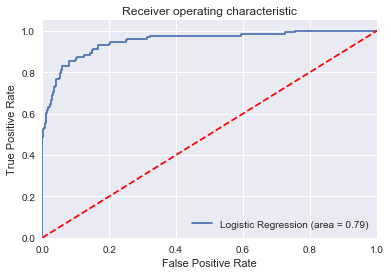

In [119]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [120]:
#Logistic Model Building using Statsmodels (ALternative)
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\vigne\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.126645
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Apr 2018   Pseudo R-squ.:                  0.5995
Time:                        10:54:34   Log-Likelihood:                -633.23
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0272      0.060     -0.453      0.651      -0.145       0.091
Exper

In [121]:
cols1 = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard','NoOfCustomers']

In [122]:
X1=Loan_Defaulters_Data[cols1]
y1=Loan_Defaulters_Data['Personal Loan']

In [124]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,X1)
result=logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.126686
         Iterations 9


In [125]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 Apr 2018   Pseudo R-squ.:                  0.5994
Time:                        10:56:41   Log-Likelihood:                -633.43
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0105      0.007      1.599      0.110      -0.002       0.023
Income                 0.0561      0.003     20.860      0.000       0.051       0.061
Family              